In [1]:
import numpy as np
from myplotstyle import plt, get_figsize, legend_ordered

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

from SAGA.database import GoogleSheets
from matplotlib.colors import to_rgb

In [2]:
print(SAGA.__version__)
saga = SAGA.QuickStart()

3.0.0
SAGA `shared_dir` set to /home/yymao/Dropbox/Work/SAGA
SAGA `local_dir`  set to /home/yymao/Documents/Work/Data/SAGA


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

In [4]:
base["radius_phys"] = np.deg2rad(base["radius"] / 3600) * base["HOST_DIST"] * 1000
radius_phys_err_median = np.median(base["radius_err"]/base["radius"])

In [5]:
sats = C.is_sat.filter(base)
sats_q, sats_sf = Query("quenched == 1").split(sats)

In [6]:
lg_sats = GoogleSheets("1TDbjRUVtKjvLR7pC-OaFt9xH4kZ6B_Am65tLyuDx4T0", gid=0).read()  # compiled by Mia
lg_sats = lg_sats[lg_sats["Mstar (1e6 Msun)"] > 1]
mw_sats, m31_sats = QueryMaker.contains_str("Association", "MW").split(lg_sats)

In [7]:
mw_sats_q, mw_sats_sf = Query("Quenched == 1").split(mw_sats)
m31_sats_q, m31_sats_sf = Query("Quenched == 1").split(m31_sats)

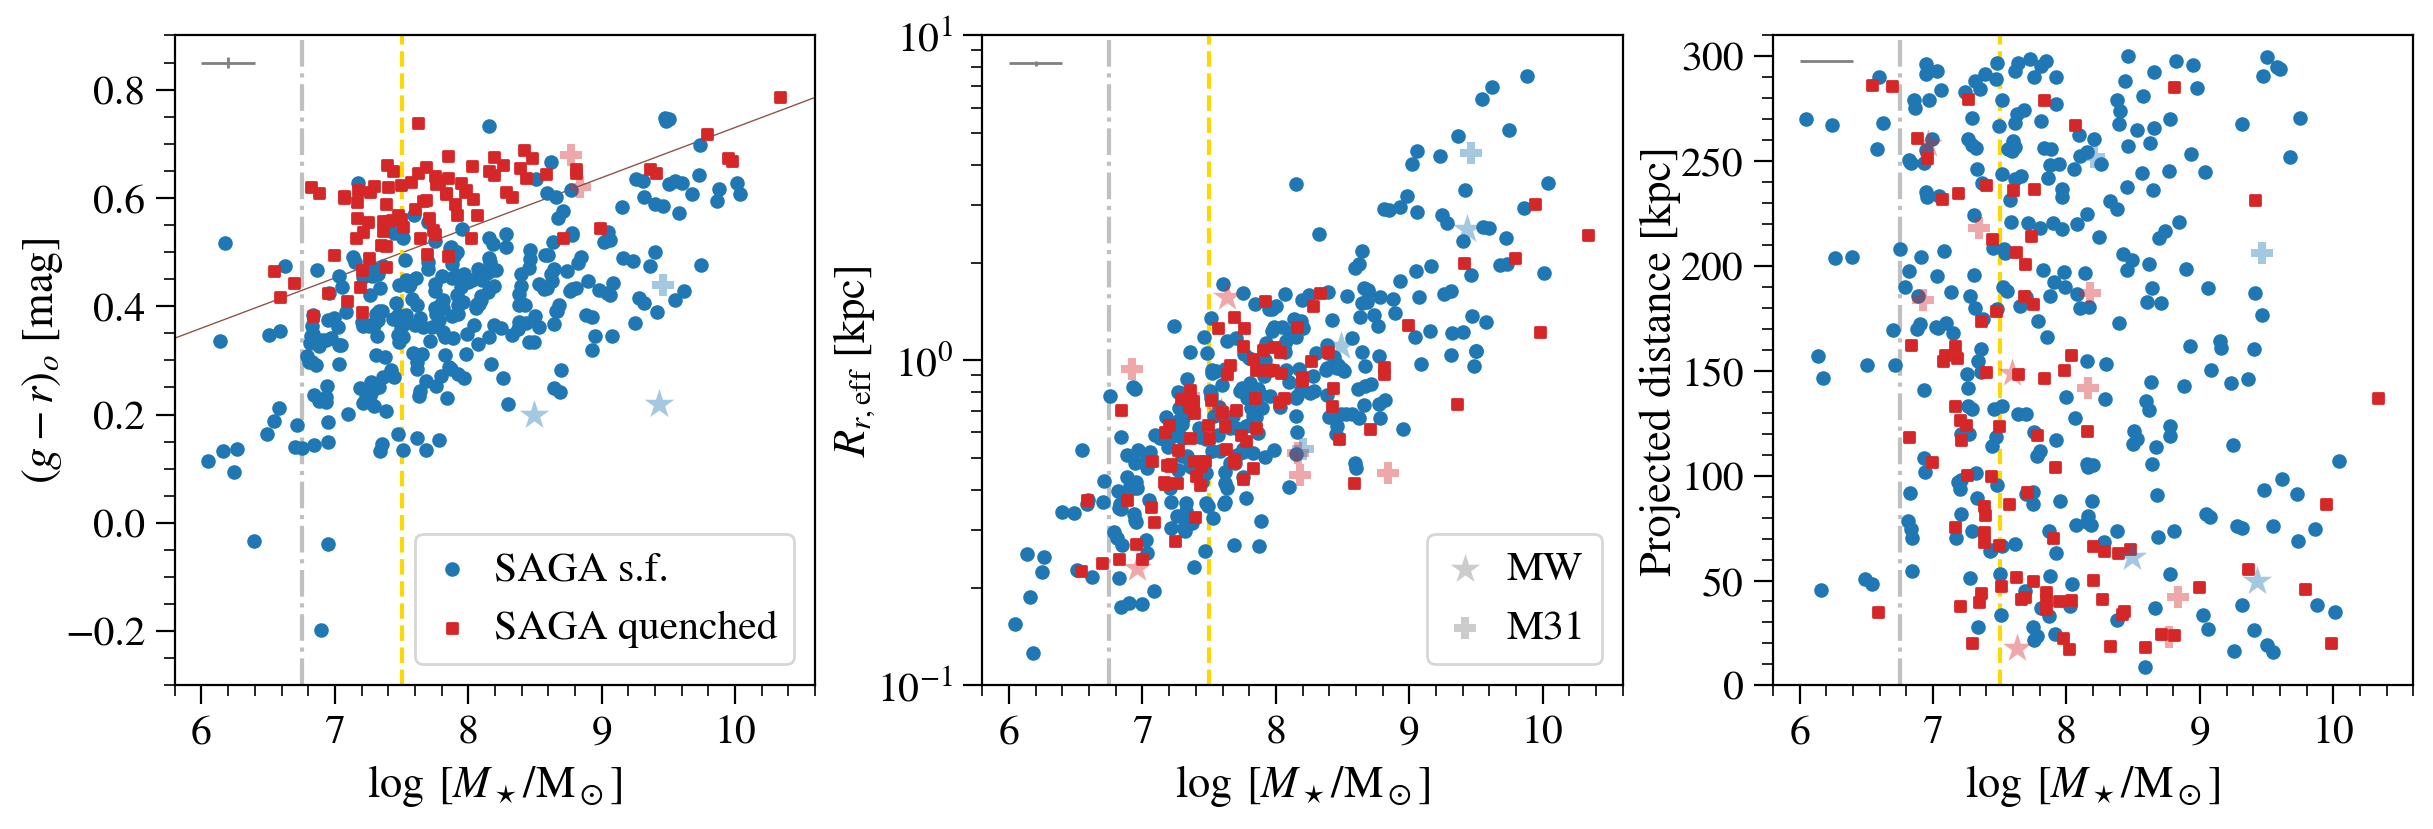

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=get_figsize(wide=True, ratio=3.1))

kwargs_sf = dict(c="C0", label="SAGA s.f.", s=18, zorder=10)
kwargs_q = dict(marker="s", c="C3", label="SAGA quenched", s=15, zorder=12)
kwargs_mw_sf = dict(marker="*", label="MW", color=(to_rgb("C0") + (0.4,)), s=125, zorder=16, lw=0)
kwargs_mw_q = dict(marker="*", color=(to_rgb("C3") + (0.4,)), s=120, zorder=16, lw=0)
kwargs_m31_sf = dict(marker="P", label="M31", color=(to_rgb("C0") + (0.4,)), s=60, zorder=16, lw=0)
kwargs_m31_q = dict(marker="P", color=(to_rgb("C3") + (0.4,)), s=60, zorder=16, lw=0)

ax_this = ax[1]
ax_this.scatter(sats_sf["log_sm"], sats_sf["radius_phys"], **kwargs_sf)
ax_this.scatter(sats_q["log_sm"], sats_q["radius_phys"], **kwargs_q)
for s, k in zip([mw_sats_q, mw_sats_sf, m31_sats_q, m31_sats_sf], [kwargs_mw_q, kwargs_mw_sf, kwargs_m31_q, kwargs_m31_sf]):
    ax_this.scatter(np.log10(s["Mstar (1e6 Msun)"]) + 6, s["R_r,eff (kpc)"], **k)
ax_this.set_yscale("log")
ax_this.set_ylabel(r"$R_{r, {\rm eff}}$ [kpc]", labelpad=0)
ax_this.set_ylim(0.1, 10)
ax_this.errorbar([6.2], [8.2], xerr=[0.2], yerr=[8.2*np.hypot(0.01, radius_phys_err_median)], marker='', color="grey", lw=1)

ax_this = ax[0]
ax_this.scatter(sats_sf["log_sm"], sats_sf["gr"], **kwargs_sf)
ax_this.scatter(sats_q["log_sm"], sats_q["gr"], **kwargs_q)
for s, k in zip([mw_sats_q, mw_sats_sf, m31_sats_q, m31_sats_sf], [kwargs_mw_q, kwargs_mw_sf, kwargs_m31_q, kwargs_m31_sf]):
    ax_this.scatter(np.log10(s["Mstar (1e6 Msun)"]) + 6, s["(g-r)0"], **k)
ms = np.linspace(5.8, 10.6, 3)
ax_this.plot(ms, 0.0926297 * ms - 0.196167, color="C5", lw=0.5, ls="-")
ax_this.set_ylabel("$(g-r)_o$ [mag]", labelpad=0)
ax_this.set_ylim(-0.3, 0.9)
ax_this.errorbar([6.2], [0.85], xerr=[0.2], yerr=[0.01*2.5/np.log(10)], marker='', color="grey", lw=1)

ax_this = ax[2]
ax_this.scatter(sats_sf["log_sm"], sats_sf["RHOST_KPC"], **kwargs_sf)
ax_this.scatter(sats_q["log_sm"], sats_q["RHOST_KPC"], **kwargs_q)
for s, k in zip([mw_sats_q, mw_sats_sf, m31_sats_q, m31_sats_sf], [kwargs_mw_q, kwargs_mw_sf, kwargs_m31_q, kwargs_m31_sf]):
    ax_this.scatter(np.log10(s["Mstar (1e6 Msun)"]) + 6, s["d_host (kpc)"], **k)
ax_this.set_ylabel("Projected distance [kpc]", labelpad=0)
ax_this.set_ylim(0, 310)
ax_this.errorbar([6.2], [298], xerr=[0.2], marker='', color="grey", lw=1)

legend_ordered(ax[0], [0, 1], loc="lower right", frameon=True, handletextpad=0.5, handlelength=1)
leg = legend_ordered(ax[1], [2, 3], loc="lower right", frameon=True, handletextpad=0.5, handlelength=1)
for h in leg.legend_handles:
    h.set_color(to_rgb("grey") + (0.4,))

for ax_this in ax:
    ax_this.axvline(7.5, color="gold", ls="--")
    ax_this.axvline(6.75, color="silver", ls="-.")
    ax_this.set_xlim(5.8, 10.6)
    ax_this.set_xlabel(r"$\log\;[M_\star/{\rm M}_\odot]$")

plt.savefig("plots/size-color-mass.pdf")